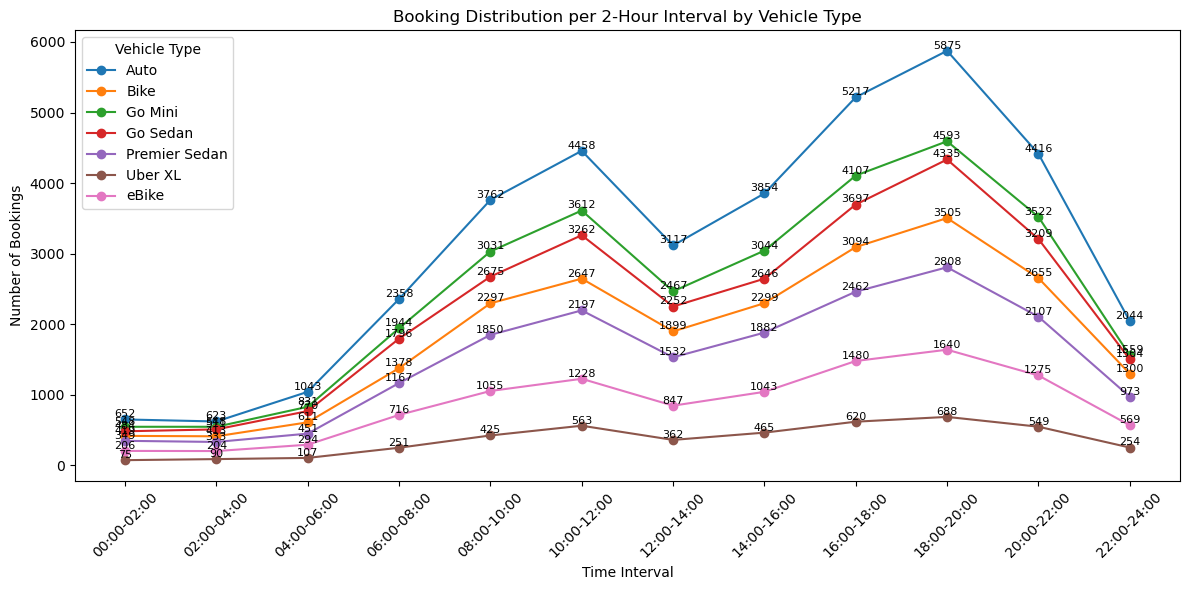

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Dataset
# Exploratory Data Analysis (EDA) - Line Chart Booking per 2-Hour Interval per Vehicle Type
df = pd.read_csv("ncr_ride_bookings.csv")

# Convert Time column to datetime
df["Time"] = pd.to_datetime(df["Time"], format="%H:%M:%S")

# Extract hour
df["Hour"] = df["Time"].dt.hour

# Define 2-hour bins and labels
bins = list(range(0, 25, 2))
labels = [f"{str(h).zfill(2)}:00-{str(h+2).zfill(2)}:00" for h in bins[:-1]]

# Group between 2-hour intervals
df["Time Group"] = pd.cut(df["Hour"], bins=bins, labels=labels, right=False)

# Count bookings per Vehicle Type per interval
time_counts = df.groupby(["Time Group", "Vehicle Type"], observed=False).size().unstack(fill_value=0)

# Line Chart
plt.figure(figsize=(12, 6))
for vehicle_type in time_counts.columns:
    plt.plot(time_counts.index, time_counts[vehicle_type], marker='o', label=vehicle_type)
# Add labels
for vehicle_type in time_counts.columns:
    for i, value in enumerate(time_counts[vehicle_type]):
        plt.text(i, value + 0.5, str(value), ha='center', va='bottom', fontsize=8)
plt.title("Booking Distribution per 2-Hour Interval by Vehicle Type")
plt.xlabel("Time Interval")
plt.ylabel("Number of Bookings")
plt.xticks(rotation=45)
plt.legend(title="Vehicle Type")
plt.tight_layout()
plt.show()